##### This code uses timecourse_env_01 as the anaconda environment

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from anndata import AnnData
import glob
import os
import scanpy as sc
from tqdm.notebook import tqdm
from core_functions.processing_and_filtering import *

In [2]:
data_dir = 'D:/amonell/timecourse_replicates'

In [3]:
input_folders = glob.glob(os.path.join(data_dir, 'day*'))

  0%|          | 0/4 [00:00<?, ?it/s]

QC metrics for batch day30_SI_r2


C:\Users\amonell\Desktop\Organized Processing-Replicates\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


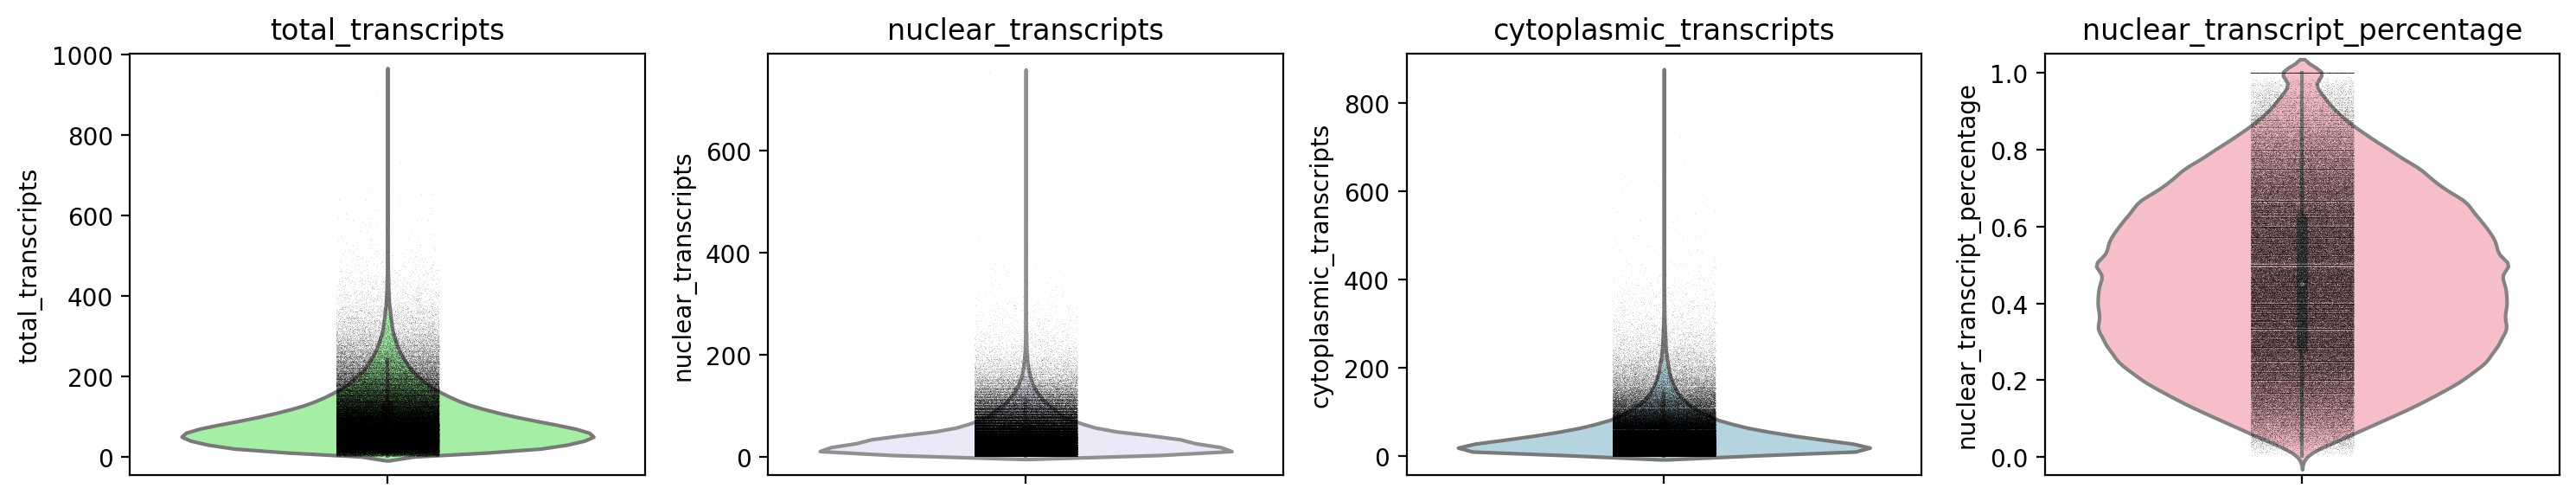

Do you want to use default filtering cutoffs (y/n)? y


303290 cells before QC filtering
259425 cells after QC filtering
QC metrics for batch day6_SI_r2


C:\Users\amonell\Desktop\Organized Processing-Replicates\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


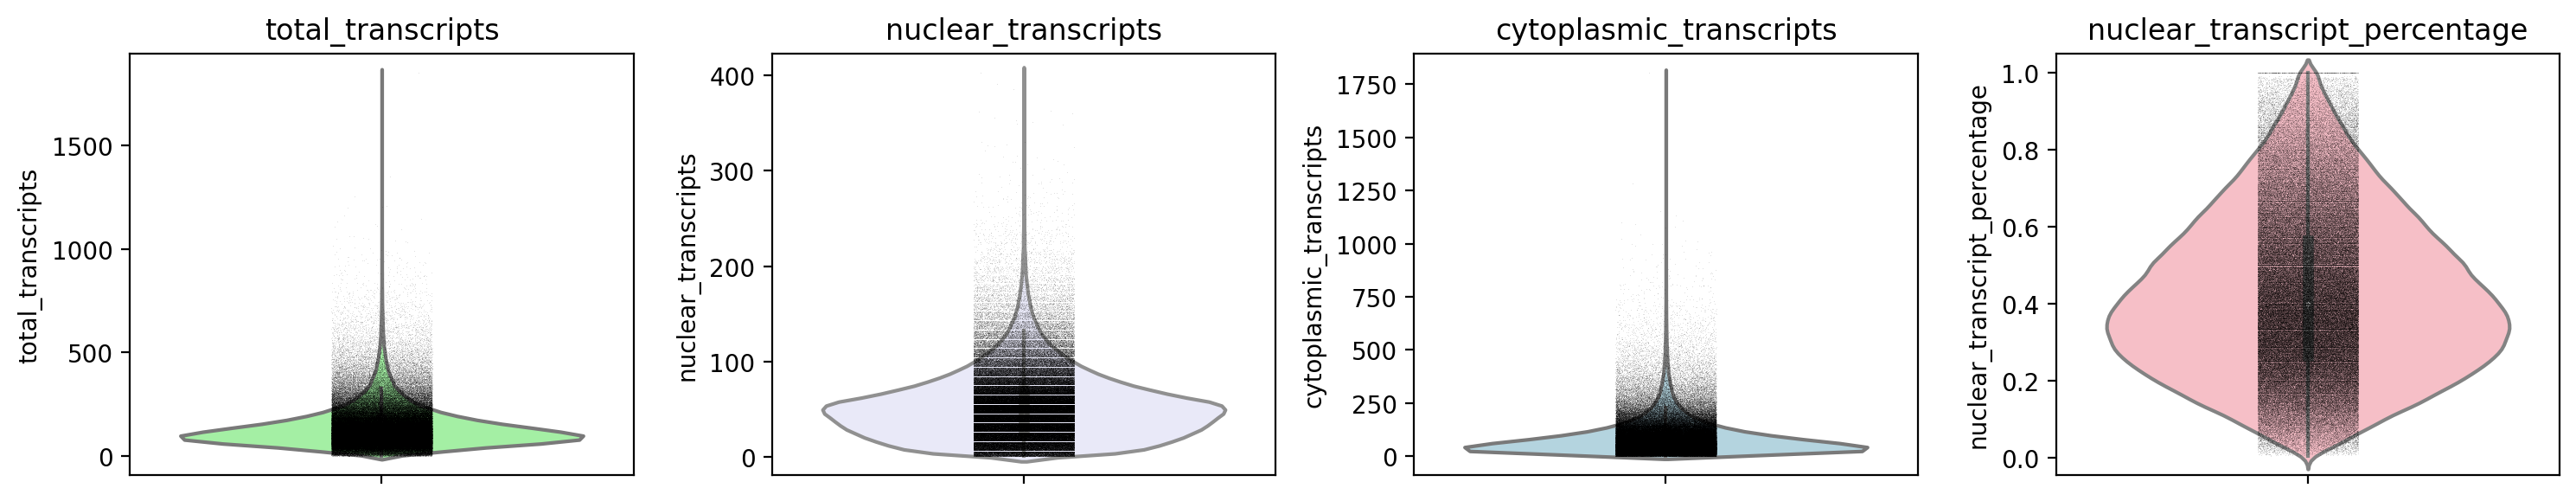

Do you want to use default filtering cutoffs (y/n)? y


297938 cells before QC filtering
280557 cells after QC filtering
QC metrics for batch day8_SI_r2


C:\Users\amonell\Desktop\Organized Processing-Replicates\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


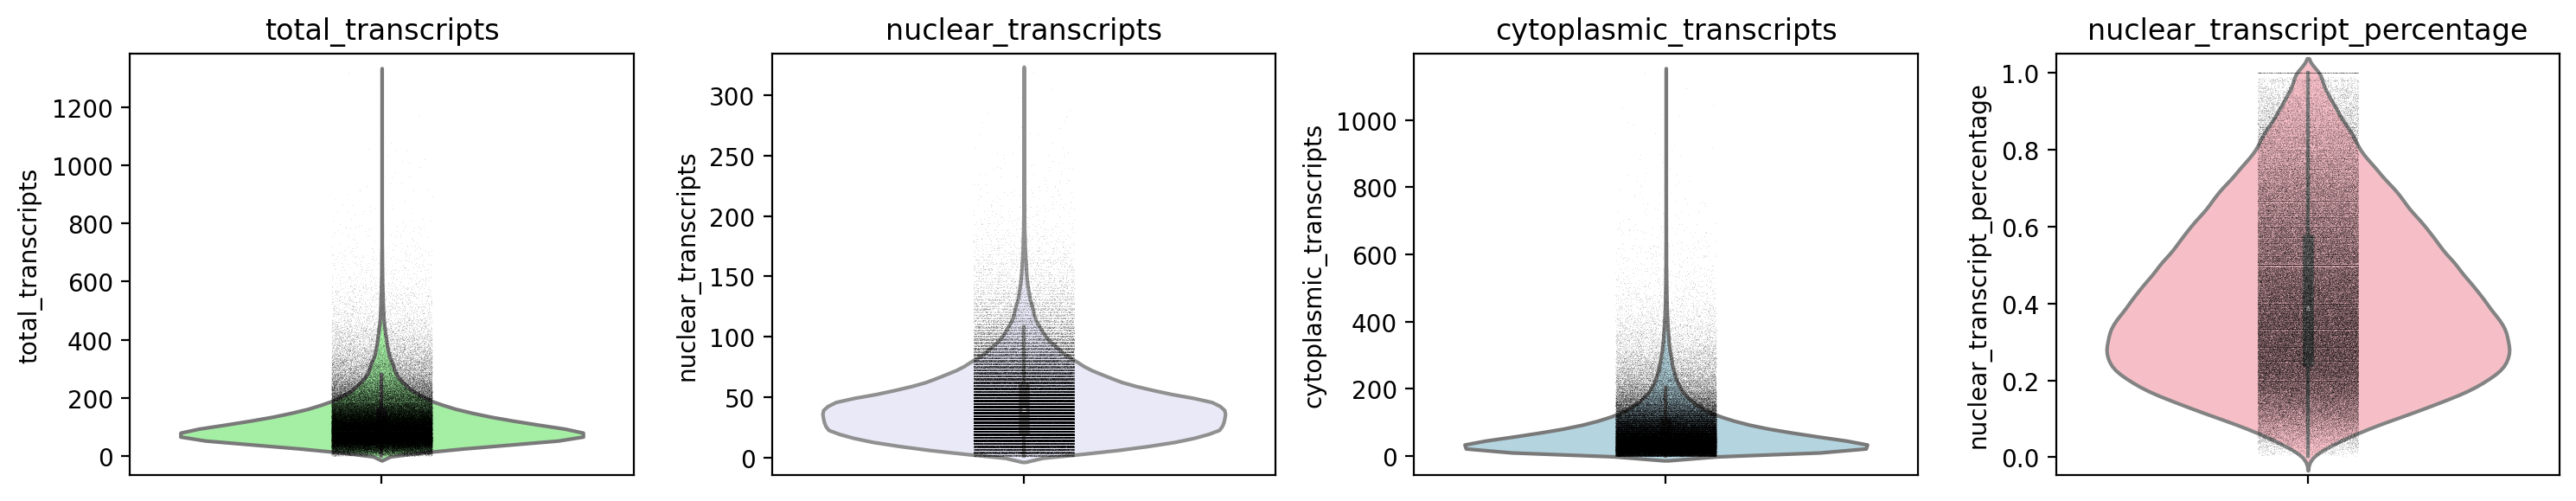

Do you want to use default filtering cutoffs (y/n)? y


211435 cells before QC filtering
198887 cells after QC filtering
QC metrics for batch day90_SI_r2


C:\Users\amonell\Desktop\Organized Processing-Replicates\core_functions\processing_and_filtering.py:32: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


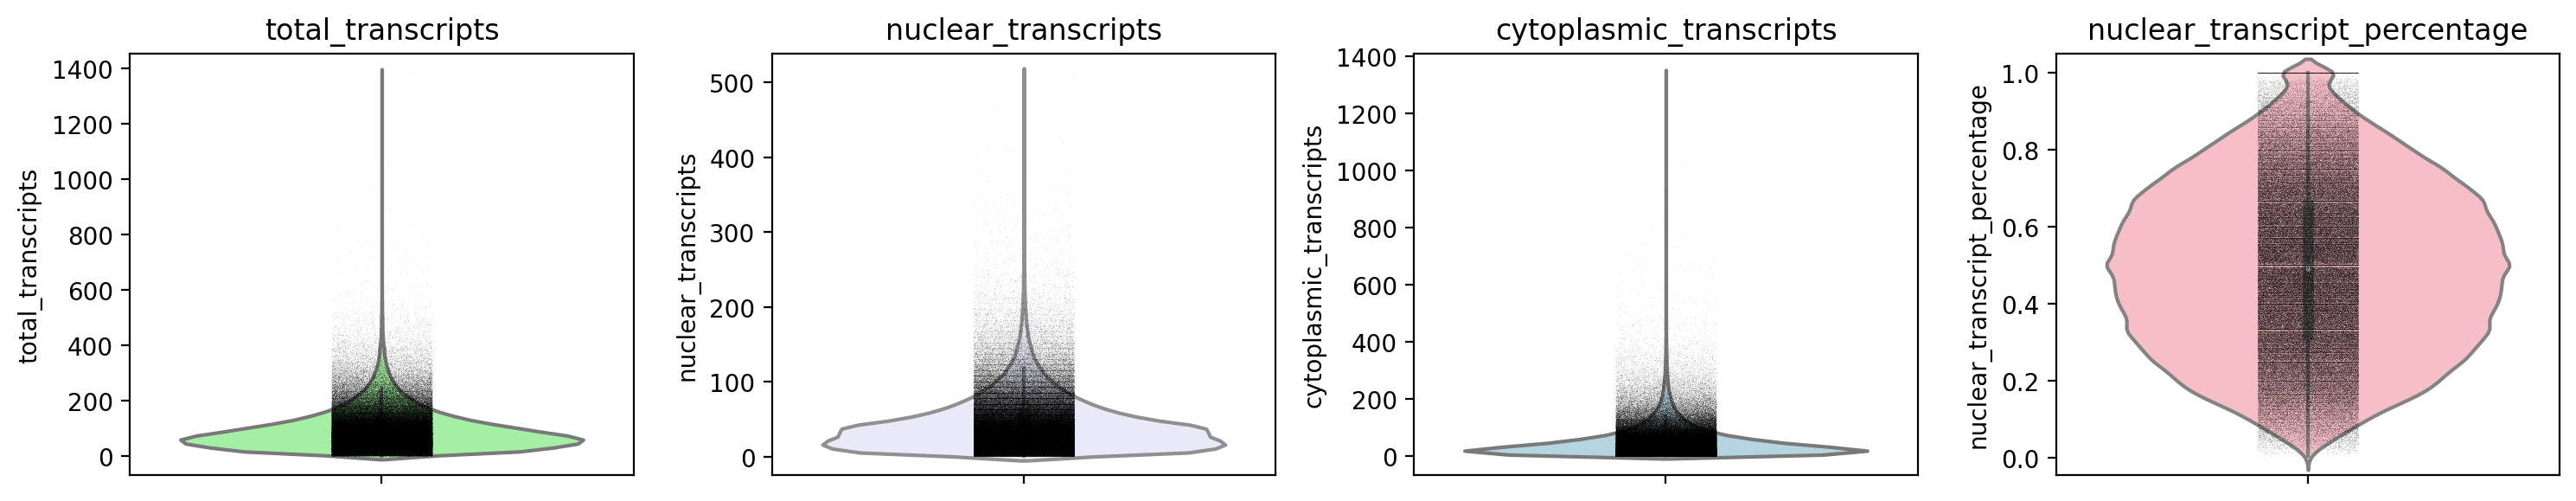

Do you want to use default filtering cutoffs (y/n)? y


275143 cells before QC filtering
241854 cells after QC filtering


In [4]:
for input_file in tqdm(input_folders):
    experiment = sc.read(os.path.join(input_file, 'adatas', '01_preprocessed.h5ad')) 
    experiment = experiment[1:, :]
    try:
        df = pd.DataFrame(experiment.X.A, columns=experiment.var.index.values, index=experiment.obs.index.values)
    except:
        df = pd.DataFrame(experiment.X, columns=experiment.var.index.values, index=experiment.obs.index.values)

    metadata = experiment.obs
    print('QC metrics for batch '+os.path.basename(input_file))

    plot_qc_feature(df, metadata, os.path.join(input_file), False)

    default_parameters = input('Do you want to use default filtering cutoffs (y/n)?')

    if default_parameters == 'n':

        min_transcript_threshold = float(input("Min transcripts threshold: "))
        max_transcript_threshold = float(input("Max transcripts threshold: "))
    
        min_nuclear_transcripts = float(input("Min nuclear transcripts: "))
        max_nuclear_transcripts = float(input("Max nuclear transcripts: "))
    
        min_cyto_transcripts = float(input("Min cyto transcripts: "))
        max_cyto_transcripts = float(input("Max cyto transcripts: "))
    
        min_nuc_pct = float(input("Min nuclear transcripts / total transcripts: "))
        max_nuc_pct = float(input("Max nuclear transcripts / total transcripts: "))

        experiment = qc_before_clustering(experiment, min_transcript_threshold, max_transcript_threshold, min_nuclear_transcripts, max_nuclear_transcripts, min_cyto_transcripts, max_cyto_transcripts, min_nuc_pct, max_nuc_pct)
    else:
        experiment = qc_before_clustering(experiment)
    del experiment.uns['points']
    experiment.write(os.path.join(input_file, 'adatas', '02_preprocessed_and_filtered.h5ad'))